In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("Breast_Cancer.csv")
data

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [6]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
y

0       Alive
1       Alive
2       Alive
3       Alive
4       Alive
        ...  
4019    Alive
4020    Alive
4021    Alive
4022    Alive
4023    Alive
Name: Status, Length: 4024, dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

sc=StandardScaler()
for column in X.columns:
    if X[column].dtype==object:
        le=LabelEncoder()
        X[column]=le.fit_transform(X[column])

        
if y.dtype == object:
    le_y = LabelEncoder()
    y = le_y.fit_transform(y)       

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [9]:
lt=[10,20,50,80,200]
acc=[]
prec=[]
rec=[]
fr=[]
cr=[]

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score
for n in lt:
    rt=RandomForestClassifier(n_estimators=n,random_state=42)
    rt.fit(X_train,y_train)
    y_pred=rt.predict(X_test)
    a=accuracy_score(y_test,y_pred)
    p=precision_score(y_test,y_pred)
    r=recall_score(y_test,y_pred)
    f=f1_score(y_test,y_pred)
    d=classification_report(y_test,y_pred,target_names=["Alive","Dead"])
    acc.append(a)
    prec.append(p)
    rec.append(r)
    fr.append(f)
    cr.append(d)
    print("Acc:",a)
    print("Report",d)
    print("---------------------")
    


Acc: 0.8938253012048193
Report               precision    recall  f1-score   support

       Alive       0.91      0.97      0.94      1131
        Dead       0.75      0.43      0.55       197

    accuracy                           0.89      1328
   macro avg       0.83      0.70      0.74      1328
weighted avg       0.88      0.89      0.88      1328

---------------------
Acc: 0.901355421686747
Report               precision    recall  f1-score   support

       Alive       0.91      0.98      0.94      1131
        Dead       0.78      0.47      0.58       197

    accuracy                           0.90      1328
   macro avg       0.85      0.72      0.76      1328
weighted avg       0.89      0.90      0.89      1328

---------------------
Acc: 0.9149096385542169
Report               precision    recall  f1-score   support

       Alive       0.92      0.98      0.95      1131
        Dead       0.84      0.53      0.65       197

    accuracy                           0.91   

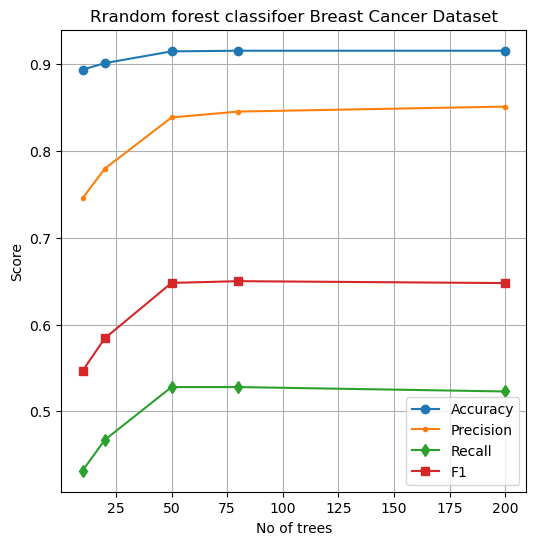

In [11]:
plt.figure(figsize=(6,6))
plt.plot(lt,acc,label='Accuracy',marker='o')
plt.plot(lt,prec,label='Precision',marker='.')
plt.plot(lt,rec,label='Recall',marker='d')
plt.plot(lt,fr,label='F1',marker='s')
plt.xlabel("No of trees")
plt.ylabel("Score")
plt.title("Rrandom forest classifoer Breast Cancer Dataset")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
y_pred=RandomForestClassifier().fit(X_train,y_train).predict(X_test)

In [13]:
y_pred=le_y.inverse_transform(y_pred)

In [14]:
for ele in y_pred:
    print(ele)

Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Dead
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Dead
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Dead
Dead
Dead
Alive
Alive
Alive
Alive
Dead
Alive
Alive
Alive
Alive
Dead
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Dead
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Dead
Alive
Alive
Alive
Alive
Dead
Alive
Alive
Alive
Alive
Dead
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Dead
Dead
Alive
Dead
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Dead
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Dead
Alive
Dead
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Dead
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Dead
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Dead
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
Alive
